## Decision Trees - Hands On

We are going to build a model that predicts if someone who seeks a loan might be a defaulter or a non-defaulter. We have several independent variables like, checking account balance, credit history, purpose, loan amount etc. For more details on the dataset, please see source at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

## Import Libraries

In [60]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [61]:
url = "../../data/credit.csv"
creditData = pd.read_csv(url)

#creditData = pd.read_csv("credit.csv")
creditData.head(10) #several missing values!

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [62]:
creditData.shape

(1000, 17)

In [63]:
creditData['default'].value_counts()

no     700
yes    300
Name: default, dtype: int64

In [64]:
creditData.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [65]:
creditData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

Lets convert the columns with an 'object' datatype into categorical variables

In [66]:
for feature in creditData.columns: # Loop through all columns in the dataframe
    if creditData[feature].dtype == 'object': # Only apply for columns with categorical strings
        creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
creditData.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [67]:
print(creditData.checking_balance.value_counts())
print(creditData.credit_history.value_counts())
print(creditData.purpose.value_counts())
print(creditData.savings_balance.value_counts())
print(creditData.employment_duration.value_counts())
print(creditData.other_credit.value_counts())
print(creditData.housing.value_counts())
print(creditData.job.value_counts())
print(creditData.phone.value_counts())


unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64


In [68]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["purpose","housing","other_credit","job"]


In [69]:
creditData=creditData.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [70]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

## Split Data

In [12]:
X = creditData.drop("default" , axis=1)
y = creditData.pop("default")

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [14]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [15]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.6933333333333334


In [16]:
#Checking number of positives
y.sum(axis = 0)

300

* The ratio of positives to negatives is 3:7, so if our model marks each sample as negative, then also we'll get 70% accuracy, hence accuracy is not a good metric to evaluate here.

**What does a bank want?**
* A bank wants to minimize the loss - it can face 2 types of losses here: 
   * Whenever bank lends money to a customer, they don't return that.
   * A bank doesn't lend money to a customer thinking he will default but in reality he won't - oppurtunity loss.

**Which loss is greater ?**
* Customer not returning the money back.

**Since we don't want people to default on the loans we should use Recall as a metric of model evaluation instead of accuracy.**

* Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

In [17]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## Confusion Matrix

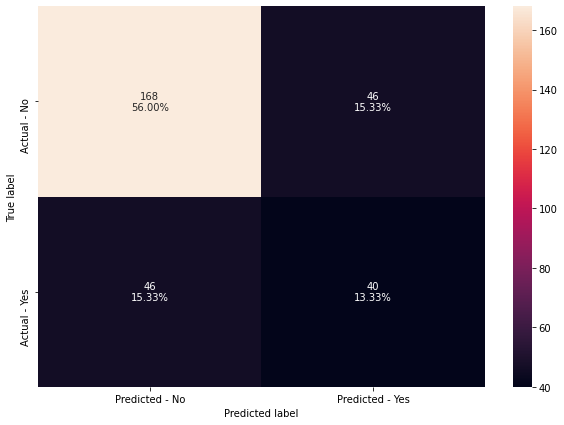

In [19]:
make_confusion_matrix(dTree,y_test)

In [20]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.46511627906976744


## Visualizing the Decision Tree

In [21]:
feature_names = list(X.columns)
print(feature_names)

['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


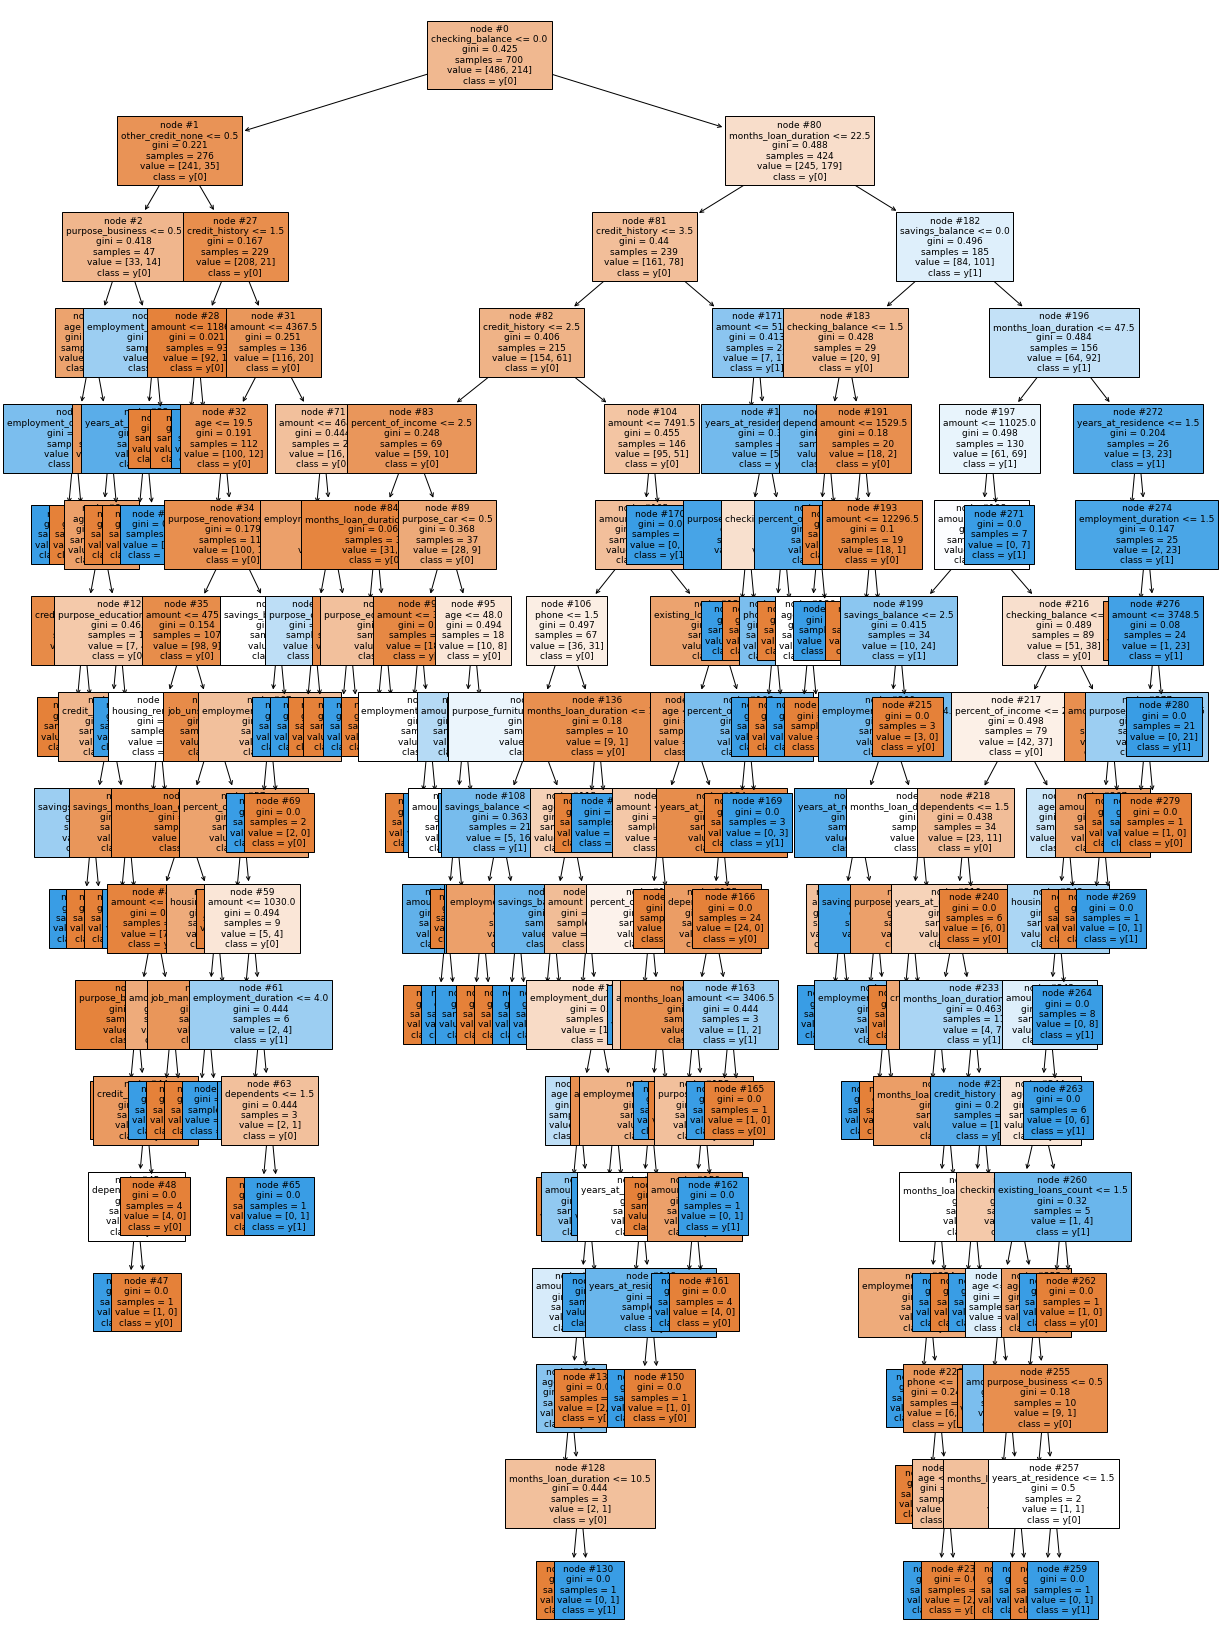

In [22]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [23]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- purpose_business <= 0.50
|   |   |   |--- age <= 25.50
|   |   |   |   |--- employment_duration <= 3.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- employment_duration >  3.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- age >  25.50
|   |   |   |   |--- age <= 38.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- credit_history <= 4.50
|   |   |   |   |   |   |   |--- weights: [13.00, 0.00] class: 0
|   |   |   |   |   |   |--- credit_history >  4.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- purpose_education <= 0.50
|   |   |   |   |   |   |   |--- credit_history <= 1.50
|   |   |   |   |   |   |   |   |--- savings_balance <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- sav

In [24]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
amount                        0.204163
checking_balance              0.136840
age                           0.110746
months_loan_duration          0.100323
employment_duration           0.073225
credit_history                0.065357
savings_balance               0.057059
years_at_residence            0.052719
percent_of_income             0.034128
purpose_business              0.023784
dependents                    0.023062
purpose_car                   0.021217
phone                         0.016737
housing_rent                  0.016646
purpose_education             0.013767
existing_loans_count          0.013575
purpose_furniture/appliances  0.012421
other_credit_none             0.011156
job_management                0.005769
purpose_renovations           0.004489
job_unskilled                 0.002818
other_credit_bank             0.000000
housing_own                   0.000000
other_credit_store            0.000000
housing_other            

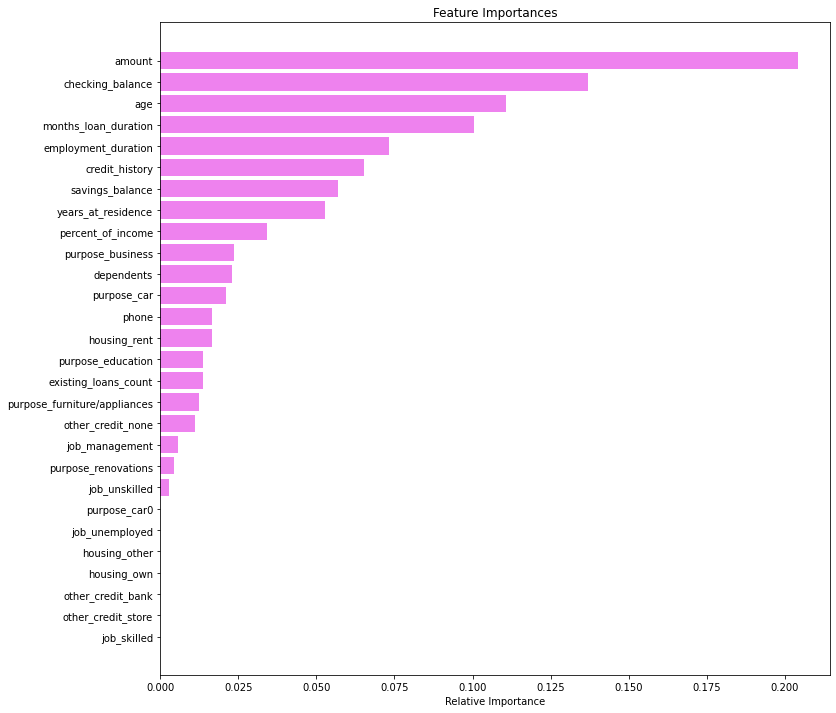

In [25]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Amount is the most important variable for predicting the customer default.

**The tree above is very complex, such a tree often overfits.**

## Reducing over fitting

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [26]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 3

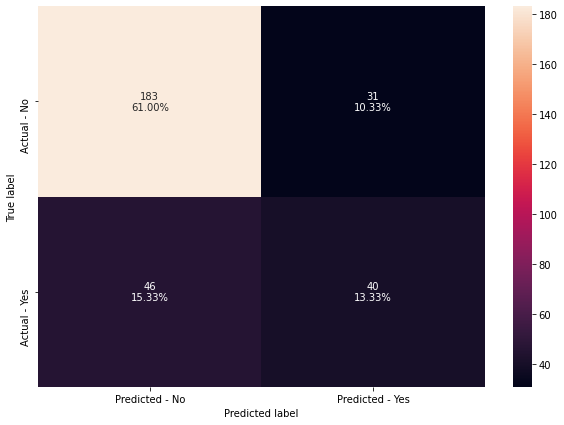

In [27]:
make_confusion_matrix(dTree1, y_test)

In [28]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.7528571428571429
Accuracy on test set :  0.7433333333333333
Recall on training set :  0.5373831775700935
Recall on test set :  0.46511627906976744


* Recall on training set has reduced from 1 to 0.53 but this is an improvement because now the model is not overfitting and we have a generalized model.

## Visualizing the Decision Tree

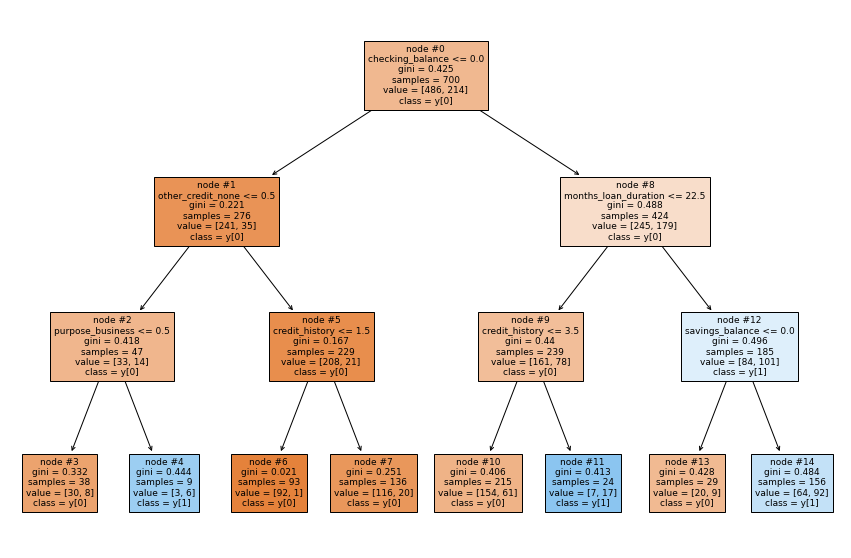

In [29]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [30]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- purpose_business <= 0.50
|   |   |   |--- weights: [30.00, 8.00] class: 0
|   |   |--- purpose_business >  0.50
|   |   |   |--- weights: [3.00, 6.00] class: 1
|   |--- other_credit_none >  0.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- weights: [92.00, 1.00] class: 0
|   |   |--- credit_history >  1.50
|   |   |   |--- weights: [116.00, 20.00] class: 0
|--- checking_balance >  0.00
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 3.50
|   |   |   |--- weights: [154.00, 61.00] class: 0
|   |   |--- credit_history >  3.50
|   |   |   |--- weights: [7.00, 17.00] class: 1
|   |--- months_loan_duration >  22.50
|   |   |--- savings_balance <= 0.00
|   |   |   |--- weights: [20.00, 9.00] class: 0
|   |   |--- savings_balance >  0.00
|   |   |   |--- weights: [64.00, 92.00] class: 1



* The tree has become readable now but the recall on test set has not improved.

In [31]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
checking_balance              0.492510
months_loan_duration          0.169806
credit_history                0.166109
savings_balance               0.064467
other_credit_none             0.055977
purpose_business              0.051129
purpose_furniture/appliances  0.000000
job_unemployed                0.000000
job_skilled                   0.000000
job_management                0.000000
other_credit_store            0.000000
other_credit_bank             0.000000
housing_rent                  0.000000
housing_own                   0.000000
housing_other                 0.000000
purpose_renovations           0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_car                   0.000000
phone                         0.000000
dependents                    0.000000
existing_loans_count          0.000000
age                           0.000000
years_at_residence            0.000000
percent_of_income        

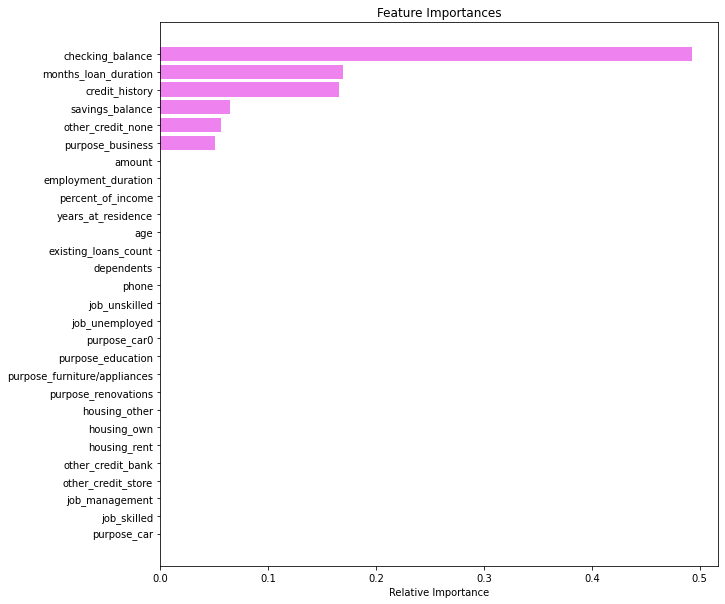

In [32]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model, amount was on top, but here importance of amount variable is zero
  this is the shortcoming of pre pruning, we just limit it even before knowing the importance of features and split.

* That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough
* It is bad to have a very low depth because your model will underfit 
* Let's see how to find the best values

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=20,
                       random_state=1)

## Confusion Matrix - decision tree with tuned hyperparameters

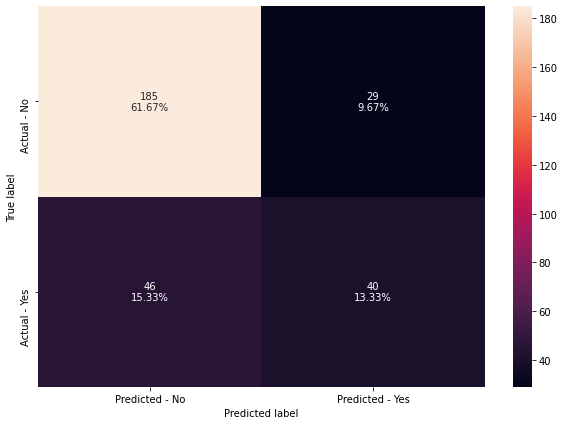

In [35]:
make_confusion_matrix(estimator,y_test)

In [36]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.7485714285714286
Accuracy on test set :  0.75
Recall on training set :  0.5093457943925234
Recall on test set :  0.46511627906976744


* After tuning hyperparameters, the performance of the model has become more generalised.

## Visualizing the Decision Tree

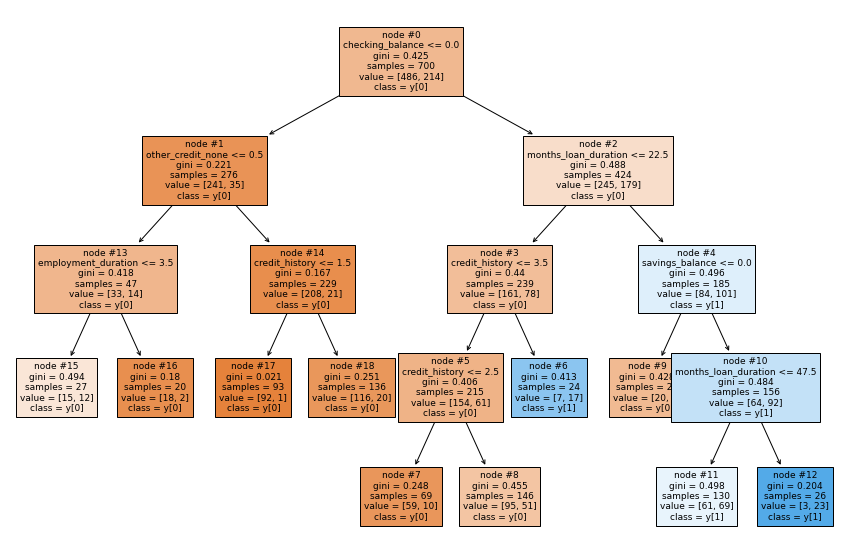

In [37]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [38]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- employment_duration <= 3.50
|   |   |   |--- weights: [15.00, 12.00] class: 0
|   |   |--- employment_duration >  3.50
|   |   |   |--- weights: [18.00, 2.00] class: 0
|   |--- other_credit_none >  0.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- weights: [92.00, 1.00] class: 0
|   |   |--- credit_history >  1.50
|   |   |   |--- weights: [116.00, 20.00] class: 0
|--- checking_balance >  0.00
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 3.50
|   |   |   |--- credit_history <= 2.50
|   |   |   |   |--- weights: [59.00, 10.00] class: 0
|   |   |   |--- credit_history >  2.50
|   |   |   |   |--- weights: [95.00, 51.00] class: 0
|   |   |--- credit_history >  3.50
|   |   |   |--- weights: [7.00, 17.00] class: 1
|   |--- months_loan_duration >  22.50
|   |   |--- savings_balance <= 0.00
|   |   |   |--- weights: [20.00, 9.00] class: 0
|   |   |--- savings_balance >  0.00
|   |  

In [39]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                   Imp
checking_balance              0.427296
months_loan_duration          0.226805
credit_history                0.201464
savings_balance               0.055931
other_credit_none             0.048565
employment_duration           0.039938
purpose_furniture/appliances  0.000000
job_unemployed                0.000000
job_skilled                   0.000000
job_management                0.000000
other_credit_store            0.000000
other_credit_bank             0.000000
housing_rent                  0.000000
housing_own                   0.000000
housing_other                 0.000000
purpose_renovations           0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_car                   0.000000
purpose_business              0.000000
phone                         0.000000
dependents                    0.000000
existing_loans_count          0.000000
age                           0.000000
years_at_residence       

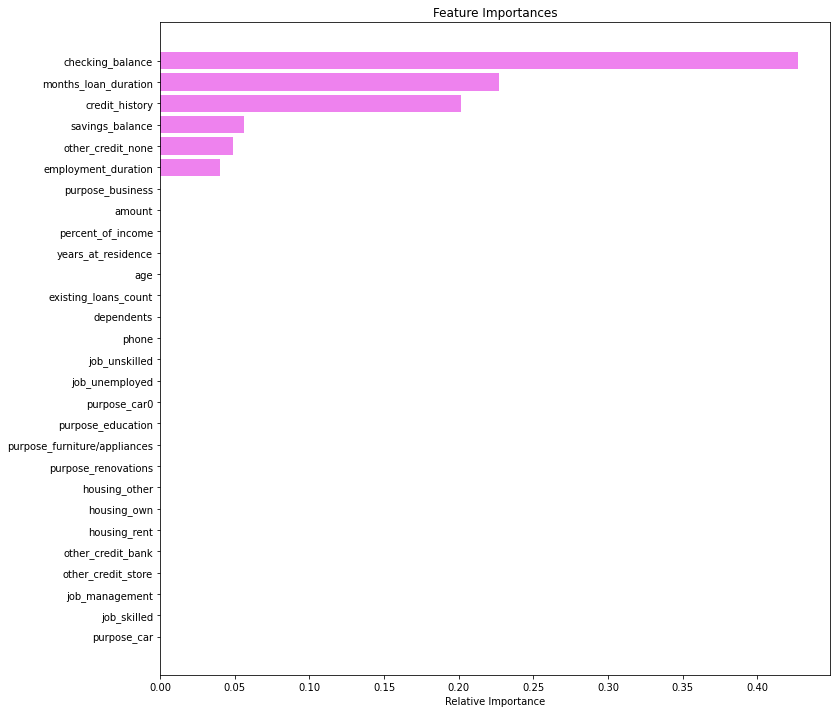

In [40]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model, employment_duration was lost, but here importance of employment_duration variable is back
This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

https://online.stat.psu.edu/stat508/lesson/11/11.8/11.8.2

In [41]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [42]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000940,0.002819
2,0.001224,0.005268
3,0.001250,0.007768
4,0.001250,0.010268
...,...,...
73,0.005618,0.335998
74,0.007117,0.357350
75,0.011122,0.368471
76,0.014366,0.382838


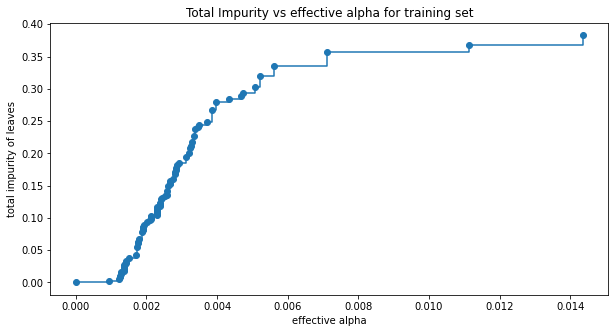

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [44]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.041668413944741134



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

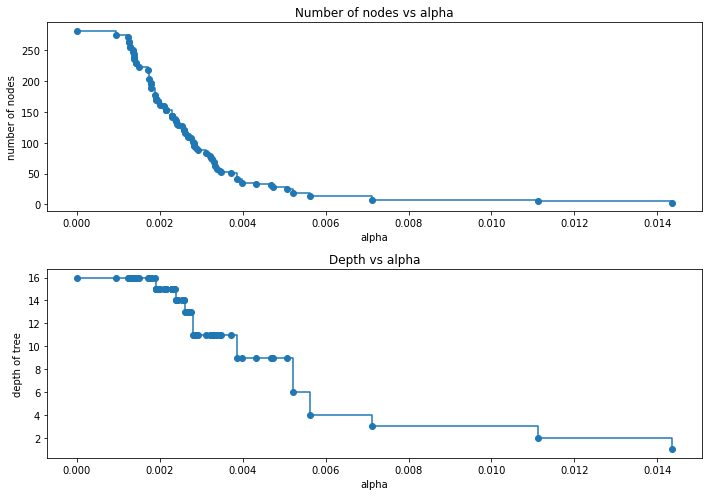

In [45]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Accuracy vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [46]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

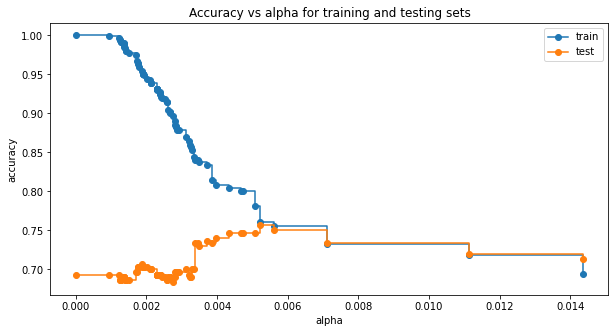

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [48]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.005203486535576088, random_state=1)
Training accuracy of best model:  0.7614285714285715
Test accuracy of best model:  0.7566666666666667


#### Since accuracy isn't the right metric for our data we would want high recall

In [49]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [50]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

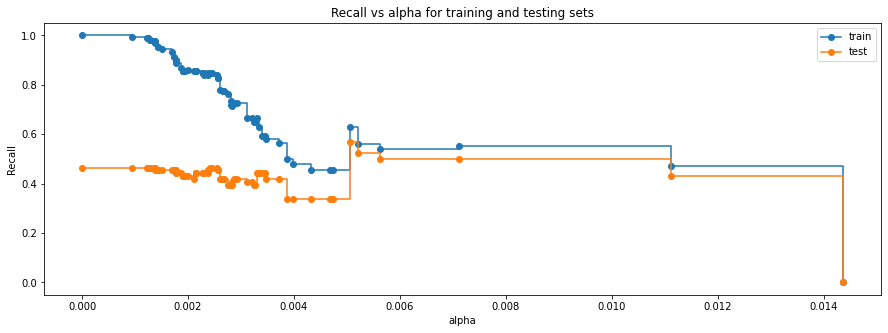

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [52]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0050611694980498625, random_state=1)


## Confusion Matrix - post-pruned decision tree

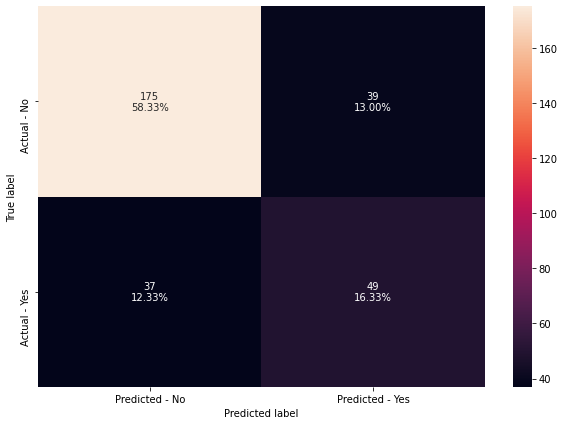

In [53]:
make_confusion_matrix(best_model,y_test)

In [54]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.6308411214953271
Recall on test set :  0.5697674418604651


* With post-pruning we get the highest recall on both training and test set

## Visualizing the Decision Tree

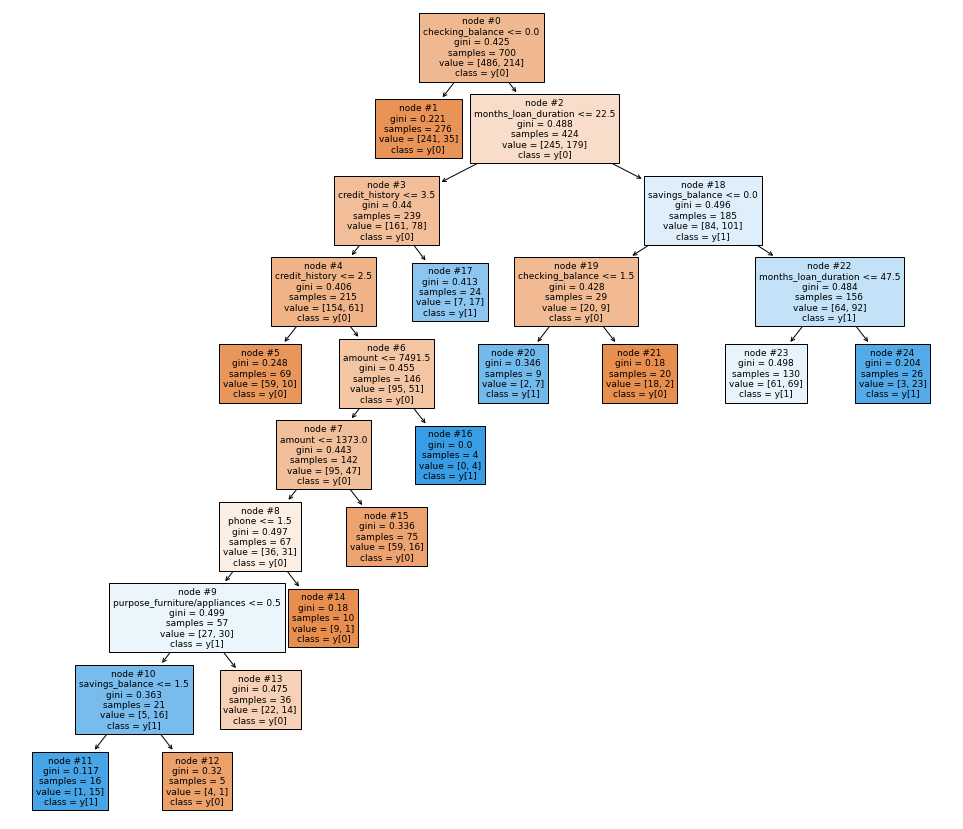

In [55]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [56]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- checking_balance <= 0.00
|   |--- weights: [241.00, 35.00] class: 0
|--- checking_balance >  0.00
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 3.50
|   |   |   |--- credit_history <= 2.50
|   |   |   |   |--- weights: [59.00, 10.00] class: 0
|   |   |   |--- credit_history >  2.50
|   |   |   |   |--- amount <= 7491.50
|   |   |   |   |   |--- amount <= 1373.00
|   |   |   |   |   |   |--- phone <= 1.50
|   |   |   |   |   |   |   |--- purpose_furniture/appliances <= 0.50
|   |   |   |   |   |   |   |   |--- savings_balance <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 15.00] class: 1
|   |   |   |   |   |   |   |   |--- savings_balance >  1.50
|   |   |   |   |   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |   |   |   |   |--- purpose_furniture/appliances >  0.50
|   |   |   |   |   |   |   |   |--- weights: [22.00, 14.00] class: 0
|   |   |   |   |   |   |--- phone >  1.50
|   |   |   |   |   |   |   |--- weights: [

In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
checking_balance              0.411788
months_loan_duration          0.182828
credit_history                0.138164
savings_balance               0.094024
amount                        0.093092
purpose_furniture/appliances  0.043586
phone                         0.036518
job_skilled                   0.000000
job_management                0.000000
purpose_renovations           0.000000
other_credit_none             0.000000
other_credit_bank             0.000000
housing_rent                  0.000000
housing_own                   0.000000
job_unemployed                0.000000
housing_other                 0.000000
other_credit_store            0.000000
purpose_car0                  0.000000
purpose_education             0.000000
purpose_car                   0.000000
purpose_business              0.000000
dependents                    0.000000
existing_loans_count          0.000000
age                           0.000000
years_at_residence       

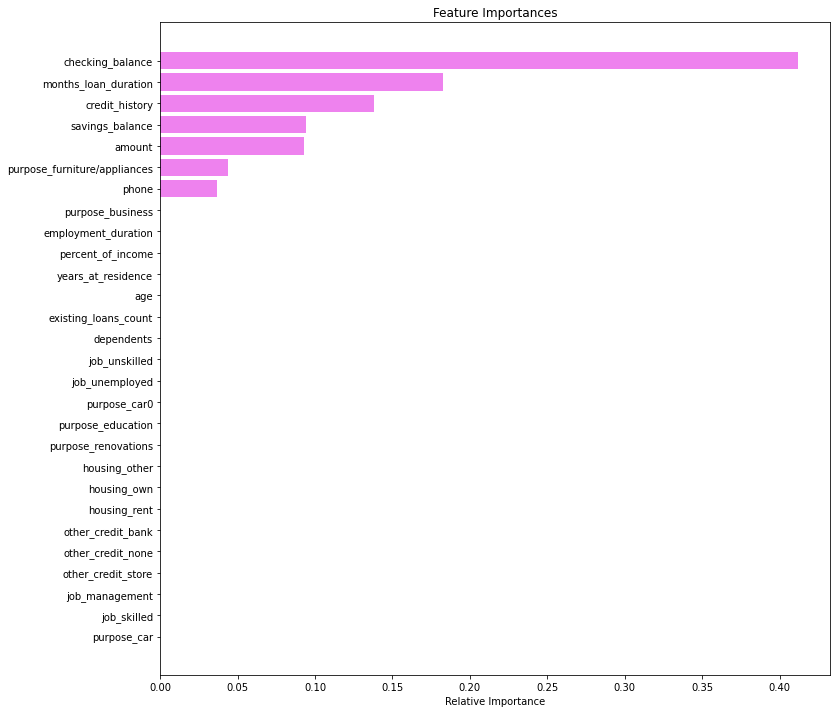

In [58]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Checking balance and Duration of loan are the most important features.

## Comparing all the decision tree models

In [59]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.53,0.51,0.63], 'Test_Recall':[0.46,0.46,0.46,0.56]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.00,0.46
1,Decision tree with restricted maximum depth,0.53,0.46
2,Decision treee with hyperparameter tuning,0.51,0.46
3,Decision tree with post-pruning,0.63,0.56


**Decision tree with post-pruning is giving the highest recall on test set.**